In [29]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [30]:
data = pd.read_csv('heart.csv')

In [31]:
print(data.head())
data.info()
data.describe()

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [32]:
list1 = data.columns[:-1]
list1

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [33]:
print(data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


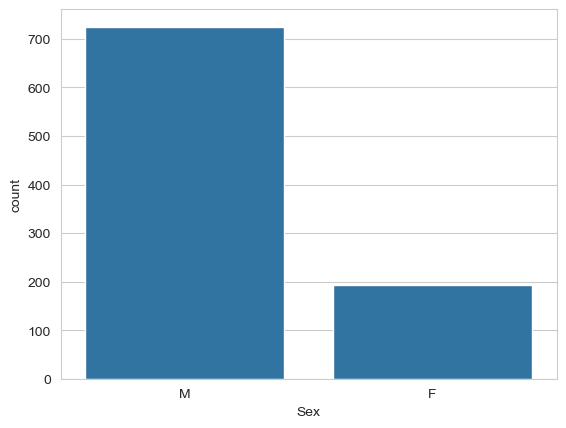

In [34]:
sns.countplot(x='Sex', data=data)
plt.show()

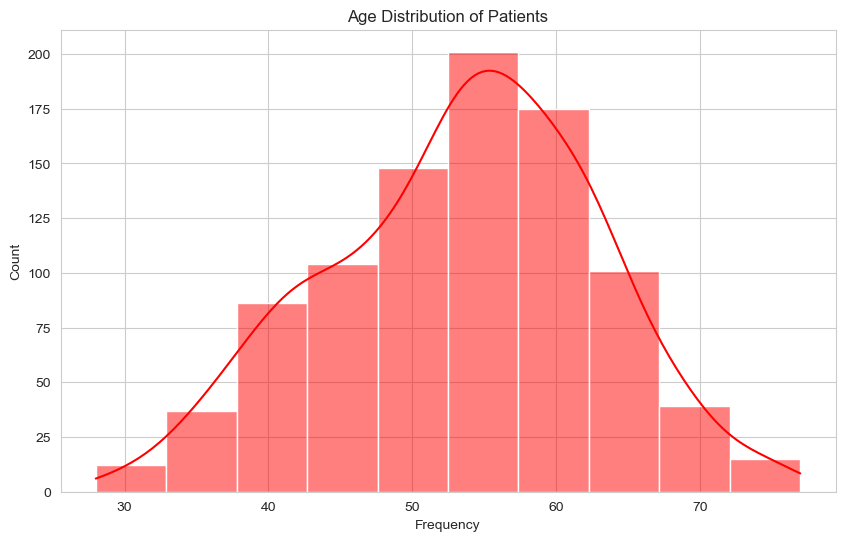

In [35]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True,color='red',bins=10)
plt.title('Age Distribution of Patients')
plt.xlabel('Frequency')
plt.show()

In [36]:
label_encoders = {}
categorical_columns = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


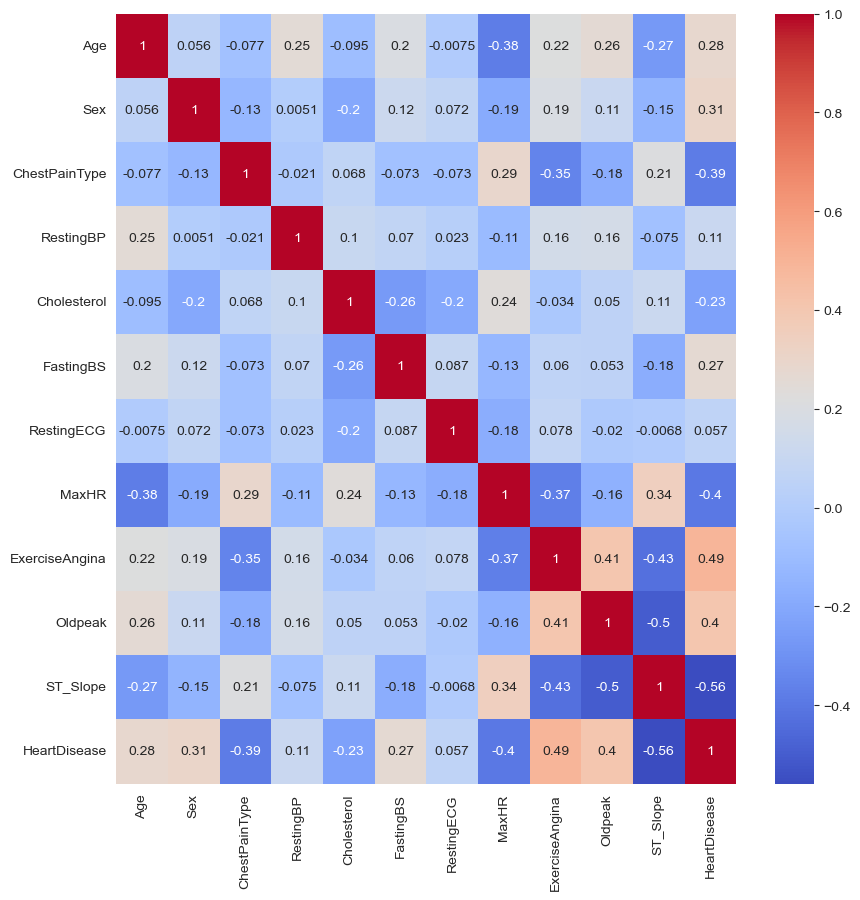

In [37]:
fig = plt.figure(figsize=(10,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [38]:
x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [39]:
x,y

(array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
        [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
        [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
        ...,
        [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
        [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
        [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]]),
 array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0,

In [40]:
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,f_classif
selector = SelectKBest(f_classif,k=5)
x_new = selector.fit_transform(x,y)
print(x_new)

[[  1.  172.    0.    0.    2. ]
 [  2.  156.    0.    1.    1. ]
 [  1.   98.    0.    0.    2. ]
 ...
 [  0.  115.    1.    1.2   1. ]
 [  1.  174.    0.    0.    1. ]
 [  2.  173.    0.    0.    2. ]]


In [41]:
x

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [42]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x_new)
scaled_features

array([[ 0.22903206,  1.38292822, -0.8235563 , -0.83243239,  1.05211381],
       [ 1.27505906,  0.75415714, -0.8235563 ,  0.10566353, -0.59607813],
       [ 0.22903206, -1.52513802, -0.8235563 , -0.83243239,  1.05211381],
       ...,
       [-0.81699495, -0.85706875,  1.21424608,  0.29328271, -0.59607813],
       [ 0.22903206,  1.4615246 , -0.8235563 , -0.83243239, -0.59607813],
       [ 1.27505906,  1.42222641, -0.8235563 , -0.83243239,  1.05211381]])

In [43]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features,y,test_size=0.2,random_state=0)

classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
    'Naive Bayes' : GaussianNB(),
    'K-nearest Neighbours' : KNeighborsClassifier()
}

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = {}
for name , clif in classifiers.items():
    clif.fit(x_train,y_train)
    y_pred = clif.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    print(f"Confusion Matrix for {name}: \n",cm)
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy : {accuracy*100:.2f}%")
    print(classification_report(y_test,y_pred))
    print('.................................................................................')

Confusion Matrix for Logistic Regression: 
 [[59 18]
 [23 84]]
Logistic Regression Accuracy : 77.72%
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        77
           1       0.82      0.79      0.80       107

    accuracy                           0.78       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.78      0.78       184

.................................................................................
Confusion Matrix for Decision Tree: 
 [[57 20]
 [17 90]]
Decision Tree Accuracy : 79.89%


              precision    recall  f1-score   support

           0       0.77      0.74      0.75        77
           1       0.82      0.84      0.83       107

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184

.................................................................................
Confusion Matrix for Random Forest: 
 [[57 20]
 [20 87]]
Random Forest Accuracy : 78.26%
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        77
           1       0.81      0.81      0.81       107

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184

.................................................................................
Confusion Matrix for Support Vector Machine: 
 [[58 19]
 [20 87]]
Support Vector Machine Accu

In [45]:
best_classifier = max(results, key=results.get)
print(f'Best Classifier: {best_classifier} with Accuracy: {results[best_classifier]:.4f}')

Best Classifier: Decision Tree with Accuracy: 0.7989
